# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | altamira
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | asfi
Processing Record 11 of Set 1 | saleaula
City not found. Skipping...
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | wanxian
Processing Record 17 of Set 1 | mgandu
Processing Record 18 of Set 1 | mahibadhoo
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | angoram
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | brownsvil

City not found. Skipping...
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | aitape
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | dali
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | maceio
Processing Record 45 of Set 4 | ahuimanu
Processing Record 46 of Set 4 | mindelo
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | hunza
City not found. Skipping...
Processing Record 49 of Set 4 | parainen
Processing Record 0 of Set 5 | sao joao da barra
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | moultrie
Processing Record 3 of Set 5 | scarborough
Processing Record 4 of Set 5 | wahran
City not found. Skipping...
Processing Record 5 of Set 5 | upata
Processing Record 6 of Set 5 | paraiso
Processing Record 7 of Set 5 | jeremie
Processing Record 8

Processing Record 24 of Set 8 | iqaluit
Processing Record 25 of Set 8 | liverpool
Processing Record 26 of Set 8 | waddan
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | tomatlan
Processing Record 29 of Set 8 | lerwick
Processing Record 30 of Set 8 | babati
Processing Record 31 of Set 8 | lengshuijiang
Processing Record 32 of Set 8 | george town
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | lufilufi
Processing Record 35 of Set 8 | bang sao thong
Processing Record 36 of Set 8 | portland
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | kishi
Processing Record 40 of Set 8 | labytnangi
Processing Record 41 of Set 8 | kiruna
Processing Record 42 of Set 8 | broken hill
Processing Record 43 of Set 8 | ballina
Processing Record 44 of Set 8 | san pedro
Processing Record 45 of Set 8 | moscow
Processing Record 46 of Set 8 | north battleford
Processing Record 47 

City not found. Skipping...
Processing Record 11 of Set 12 | sitangkai
Processing Record 12 of Set 12 | artyk
City not found. Skipping...
Processing Record 13 of Set 12 | langres
Processing Record 14 of Set 12 | orange cove
Processing Record 15 of Set 12 | vestmannaeyjar
Processing Record 16 of Set 12 | nagorsk
Processing Record 17 of Set 12 | ola
Processing Record 18 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 19 of Set 12 | lincoln
Processing Record 20 of Set 12 | sangre grande
Processing Record 21 of Set 12 | tweed
Processing Record 22 of Set 12 | yantzaza
Processing Record 23 of Set 12 | labuan
Processing Record 24 of Set 12 | acari
Processing Record 25 of Set 12 | tagusao
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | strezhevoy
Processing Record 28 of Set 12 | pedernales
Processing Record 29 of Set 12 | moerai
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | hendaye
Processing Record 32 of Set

In [41]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,274.16,93,100,1.54,GL,1682286200
1,altamira,-3.2033,-52.2064,299.20,89,75,0.00,BR,1682286201
2,lavrentiya,65.5833,-171.0000,265.46,69,2,2.45,RU,1682286201
3,tasiilaq,65.6145,-37.6368,275.24,91,100,2.68,GL,1682286202
4,hobart,-42.8794,147.3294,280.96,84,0,3.60,AU,1682286009


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,274.16,93,100,1.54,GL,1682286200
1,altamira,-3.2033,-52.2064,299.20,89,75,0.00,BR,1682286201
2,lavrentiya,65.5833,-171.0000,265.46,69,2,2.45,RU,1682286201
3,tasiilaq,65.6145,-37.6368,275.24,91,100,2.68,GL,1682286202
4,hobart,-42.8794,147.3294,280.96,84,0,3.60,AU,1682286009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

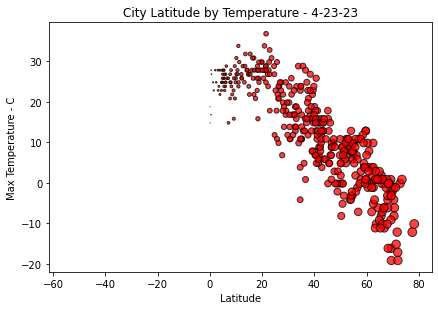

In [63]:
# Build scatter plot for latitude vs. temperature

city_data_df["Max Temp"] = city_data_df["Max Temp"].astype("float")
city_data_df.dtypes
city_data_df["Max Temp C"]= city_data_df["Max Temp"]-273.15

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp C"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.tight_layout()
plt.title("City Latitude by Temperature - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature - C")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

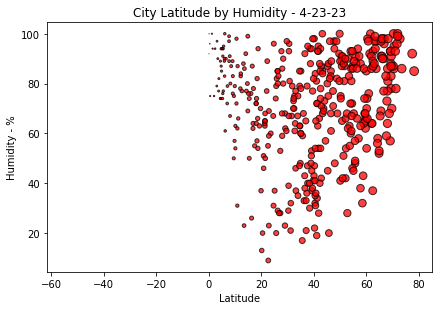

<Figure size 432x288 with 0 Axes>

In [65]:
# Build the scatter plots for latitude vs. humidity

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.tight_layout()
plt.title("City Latitude by Humidity - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Humidity - %")

# # Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

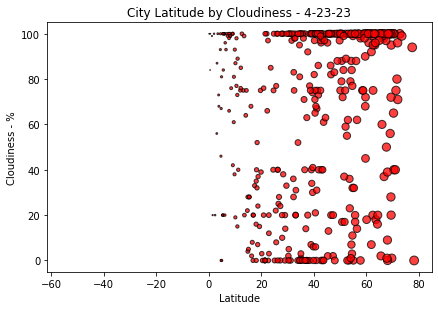

In [66]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.tight_layout()
plt.title("City Latitude by Cloudiness - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness - %")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

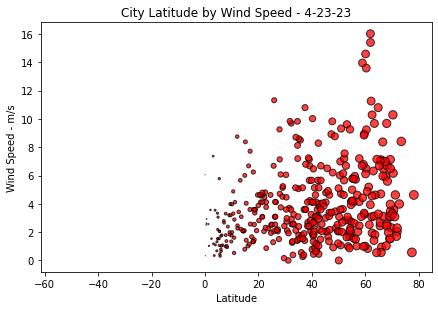

In [81]:
# Build the scatter plots for latitude vs. wind speed

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.tight_layout()
plt.title("City Latitude by Wind Speed - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed - m/s")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plot

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,ilulissat,69.2167,-51.1000,274.0,93,100,1.54,GL,1682286200,0.85
2,lavrentiya,65.5833,-171.0000,265.0,69,2,2.45,RU,1682286201,-8.15
3,tasiilaq,65.6145,-37.6368,275.0,91,100,2.68,GL,1682286202,1.85
6,cayenne,4.9333,-52.3333,298.0,94,0,1.54,GF,1682286204,24.85
8,asfi,32.2994,-9.2372,290.0,73,28,9.69,MA,1682286205,16.85


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
1,altamira,-3.2033,-52.2064,299.0,89,75,0.00,BR,1682286201,25.85
4,hobart,-42.8794,147.3294,280.0,84,0,3.60,AU,1682286009,6.85
5,ushuaia,-54.8000,-68.3000,279.0,57,20,2.06,AR,1682286203,5.85
7,atuona,-9.8000,-139.0333,300.0,77,18,6.52,PF,1682286204,26.85
12,sola,-13.8833,167.5500,301.0,84,75,3.60,VU,1682286207,27.85


###  Temperature vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(*args, **kw)>

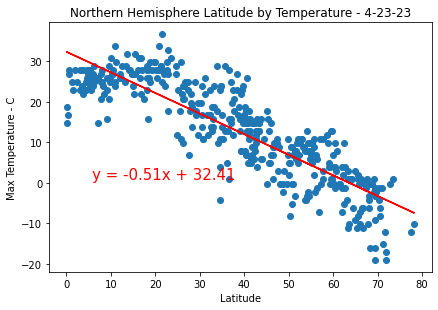

In [86]:
# Linear regression on Northern Hemisphere
x_nh = northern_hemi_df["Lat"]
y_nh = northern_hemi_df["Max Temp C"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_nh, y_nh)
regress_values = x_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_nh,y_nh)
plt.plot(x_nh,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Northern Hemisphere Latitude by Temperature - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature - C")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

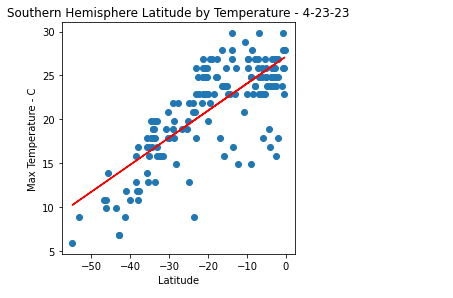

In [89]:
# Linear regression on Southern Hemisphere
x_sh = southern_hemi_df["Lat"]
y_sh = southern_hemi_df["Max Temp C"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sh, y_sh)
regress_values = x_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sh,y_sh)
plt.plot(x_sh,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Southern Hemisphere Latitude by Temperature - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature - C")
plt.show

**Discussion about the linear relationship:** As shown in both models for the northern and southern hemispheres, there is a definate correlation that shows the temperature decreases the further you get from the equator in either direction, north or south.

### Humidity vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(*args, **kw)>

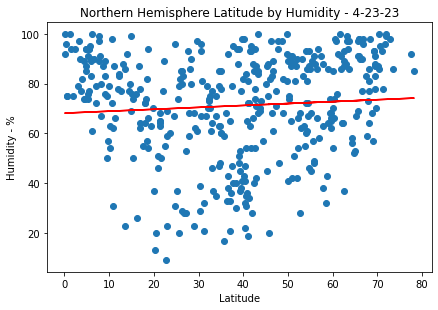

In [90]:
# Northern Hemisphere
x_nh_lh = northern_hemi_df["Lat"]
y_nh_lh = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_nh_lh, y_nh_lh)
regress_values = x_nh_lh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_nh_lh,y_nh_lh)
plt.plot(x_nh_lh,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Northern Hemisphere Latitude by Humidity - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Humidity - %")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

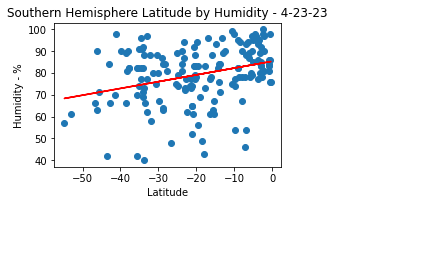

In [91]:
# Southern Hemisphere
x_sh_lh = southern_hemi_df["Lat"]
y_sh_lh = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sh_lh, y_sh_lh)
regress_values = x_sh_lh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sh_lh,y_sh_lh)
plt.plot(x_sh_lh,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Southern Hemisphere Latitude by Humidity - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Humidity - %")
plt.show

**Discussion about the linear relationship:** The southern hemisphere shows a correlation between humidity and distance from the equator. The further you get from the equator to the south, the less humidity to expect. There is a similar pattern of humidty reduction in the northern hemisphere as you head north from the equator, though less insignificant.

### Cloudiness vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(*args, **kw)>

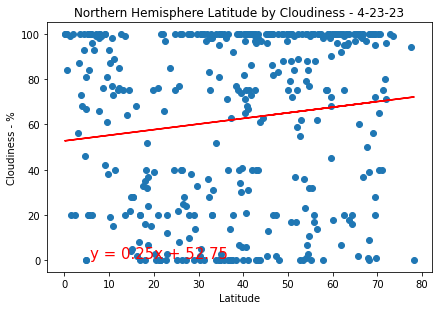

In [92]:
# Northern Hemisphere
x_nh_lc = northern_hemi_df["Lat"]
y_nh_lc = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_nh_lc, y_nh_lc)
regress_values = x_nh_lc * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_nh_lc,y_nh_lc)
plt.plot(x_nh_lc,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Northern Hemisphere Latitude by Cloudiness - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness - %")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

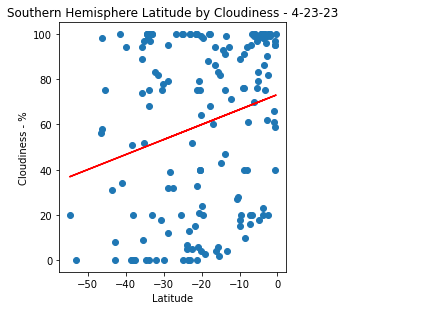

In [93]:
# Southern Hemisphere
x_sh_lc = southern_hemi_df["Lat"]
y_sh_lc = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sh_lc, y_sh_lc)
regress_values = x_sh_lc * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sh_lc,y_sh_lc)
plt.plot(x_sh_lc,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Southern Hemisphere Latitude by Cloudiness - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness - %")
plt.show

**Discussion about the linear relationship:** The model for the northern hemisphere shows a positive correlation, that the further you go north, the cloudier it gets. However, the opposite is true for the southern hemisphere. There is a correlation showing that as you get closer to the equator, the cloudier it becomes. Which seems to support as you head north the cloudier it becomes.

### Wind Speed vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(*args, **kw)>

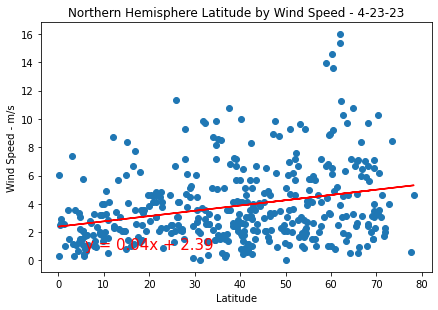

In [94]:
# Northern Hemisphere
x_nh_ls = northern_hemi_df["Lat"]
y_nh_ls = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_nh_ls, y_nh_ls)
regress_values = x_nh_ls * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_nh_ls,y_nh_ls)
plt.plot(x_nh_ls,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Northern Hemisphere Latitude by Wind Speed - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed - m/s")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

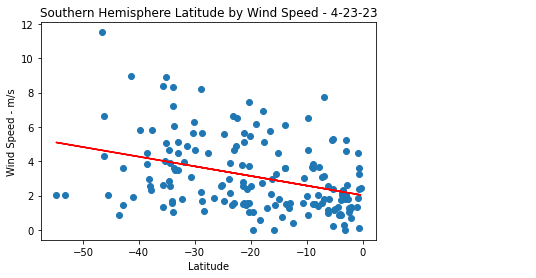

In [97]:
# Southern Hemisphere
x_sh_ls = southern_hemi_df["Lat"]
y_sh_ls = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sh_ls, y_sh_ls)
regress_values = x_sh_ls * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sh_ls,y_sh_ls)
plt.plot(x_sh_ls,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Southern Hemisphere Latitude by Wind Speed - 4-23-23")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed - m/s")
plt.show

**Discussion about the linear relationship:** As shown in both models for the northern and southern hemispheres, there is a definate correlation that shows the wind speed increases the further you get from the equator, in both directions, north and south.

In [ ]:
# Thank you!